In [433]:
import numpy as np
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from pdb import set_trace
from data.data_utils import load_dataset
import random

np.random.seed(42)


# Full batch gradient descent

In [434]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')
x_train, y_train = x_train[:1000], y_train[:1000]

In [435]:
x_train.shape # 32 = number of features in the data

(1000, 32)

In [436]:
y_train.shape

(1000, 1)

In [437]:
x_train.shape

(1000, 32)

In [438]:
# Get RMSE
def RMSE(y, y_hat):
  return np.sqrt(np.mean(np.square(y-y_hat)))

Epoch 0: Training error = 0.9375205564629729
Epoch 100: Training error = 0.849479981360714
Epoch 200: Training error = 0.849479981360714
Epoch 300: Training error = 0.8494799813607139
Epoch 400: Training error = 0.8494799813607139
Epoch 500: Training error = 0.8494799813607139
Epoch 600: Training error = 0.8494799813607139
Epoch 700: Training error = 0.8494799813607139
Epoch 800: Training error = 0.8494799813607139
Epoch 900: Training error = 0.8494799813607139
Test RMSE = 0.8706763884460342


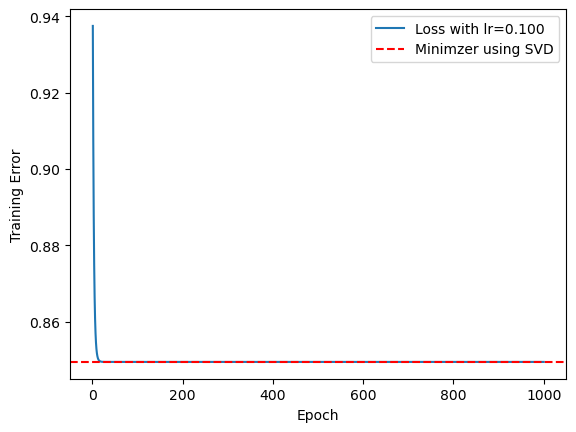

Epoch 0: Training error = 0.977749435843253
Epoch 100: Training error = 0.8525980168539792
Epoch 200: Training error = 0.8495739736112354
Epoch 300: Training error = 0.8494832716637606
Epoch 400: Training error = 0.8494801068257672
Epoch 500: Training error = 0.8494799864200022
Epoch 600: Training error = 0.8494799815731423
Epoch 700: Training error = 0.8494799813699142
Epoch 800: Training error = 0.8494799813611225
Epoch 900: Training error = 0.8494799813607324
Test RMSE = 0.87067638451221


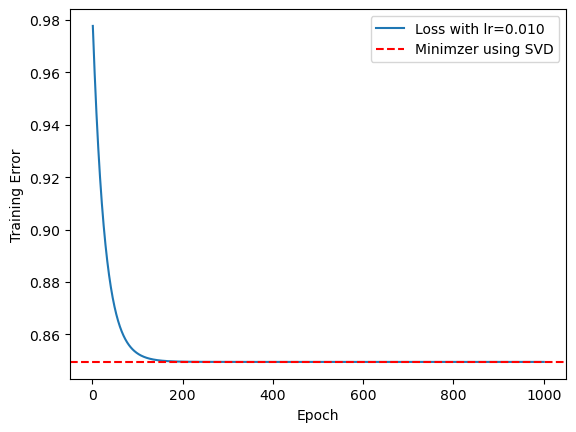

Epoch 0: Training error = 0.9821254386013638
Epoch 100: Training error = 0.9410457307377827
Epoch 200: Training error = 0.912535476300752
Epoch 300: Training error = 0.8928701553911961
Epoch 400: Training error = 0.8793531475004432
Epoch 500: Training error = 0.8700754378904036
Epoch 600: Training error = 0.8637068735069955
Epoch 700: Training error = 0.859330231820335
Epoch 800: Training error = 0.8563169402854083
Epoch 900: Training error = 0.8542375831520419
Test RMSE = 0.8668372992820195


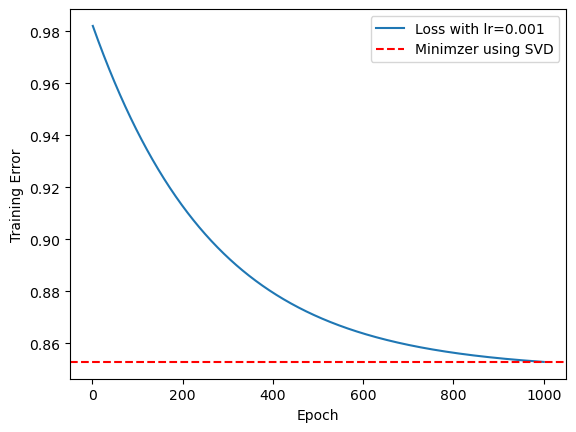

In [439]:
# Set the learning rate and the number of epochs
lr = 0.1
epochs = 1000

def full_batch_gd(x_train, y_train, x_test, y_test, lr, epochs):
    # Initialize the weights with zeros
    w = np.zeros((x_train.shape[1], 1)) #(32,)
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        # Compute Full-Batch Gradient
        grad_w = (2/x_train.shape[0]) * x_train.T.dot(x_train.dot(w) - y_train)
        w = w - lr * grad_w
        # Compute the training error
        train_error = RMSE(y_train, x_train.dot(w))
        # get best weights
        if len(train_errors) > 0 and train_error < train_errors[-1]:
            w_best = w
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")

    # Compute the predicted values for the testing dataset
    y_hat_test = np.dot(x_test, w_best)

    # Compute the testing error
    test_error = RMSE(y_test, y_hat_test)
    # Print the final testing error (root mean squared error)
    print(f"Test RMSE = {test_error}")
    # plot training error versus epochs
    plt.plot(range(1, epochs+1), train_errors, label="Loss with lr=%.3f"%lr)
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.axhline(y=np.min(train_errors), color='r', linestyle='--', label="Minimzer using SVD")
    plt.legend(loc='best')
    plt.show()

for lr in [0.1, 0.01, 0.001]:
    full_batch_gd(x_train, y_train, x_test, y_test, lr, 1000)

In [440]:
y_train.shape

(1000, 1)

## Stochastic gradient descent (SGD) with mini-batch size 1

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 1.0350032431539409
Epoch 2000: Training error = 0.9867384358951969
Epoch 3000: Training error = 1.0682114009395118
Epoch 4000: Training error = 1.1571533807862855
Epoch 5000: Training error = 1.0713675545096557
Epoch 6000: Training error = 1.1227000119844397
Epoch 7000: Training error = 1.0121490974006806
Epoch 8000: Training error = 1.0236199012813862
Epoch 9000: Training error = 1.0517985091292916
Test RMSE = 1.0427270277581038


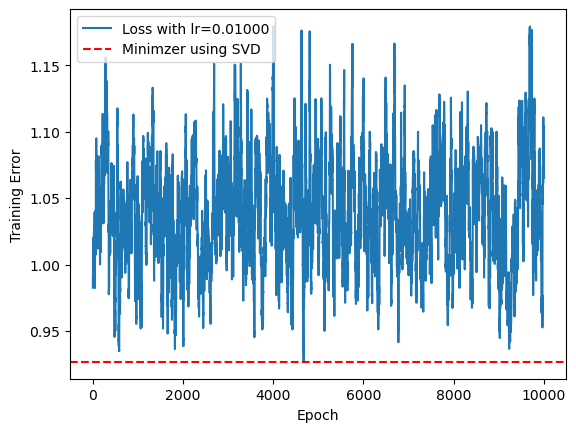

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 0.8669881215529612
Epoch 2000: Training error = 0.8661253735202894
Epoch 3000: Training error = 0.8619499348598378
Epoch 4000: Training error = 0.872612688297227
Epoch 5000: Training error = 0.8624749531195846
Epoch 6000: Training error = 0.8599790620216292
Epoch 7000: Training error = 0.8675063903623645
Epoch 8000: Training error = 0.8641995942950315
Epoch 9000: Training error = 0.8580532637736427
Test RMSE = 0.8909163453833199


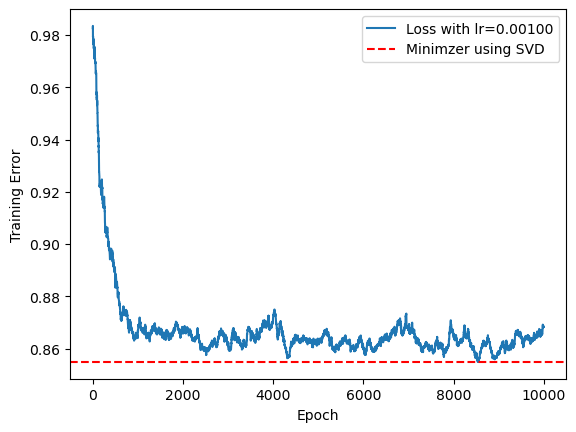

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 0.9433271646733752
Epoch 2000: Training error = 0.915206319253181
Epoch 3000: Training error = 0.8949670007257642
Epoch 4000: Training error = 0.8806783821460841
Epoch 5000: Training error = 0.8706918530408102
Epoch 6000: Training error = 0.864988178971418
Epoch 7000: Training error = 0.8596207915241003
Epoch 8000: Training error = 0.8572189848914514
Epoch 9000: Training error = 0.8549850345833394
Test RMSE = 0.86820104459282


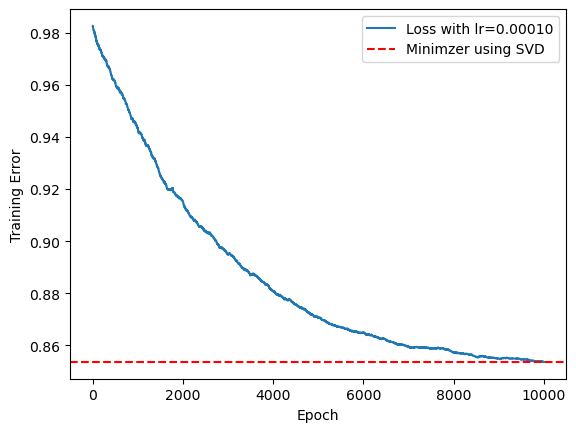

In [443]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')
x_train, y_train = x_train[:1000], y_train[:1000]
def sgd_mini_batch(x_train, y_train, x_test, y_test, lr=0.0001, epochs=5000):
    # Initialize the weights with zeros
    w = np.zeros((x_train.shape[1], 1)) #(32,)
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        i = random.randint(0, len(y_train)-1)
        # print(x_train[i].shape)
        grad_w = -2 * np.dot(x_train[i].reshape(-1,1), (y_train[i] - np.dot(x_train, w)[i]).reshape(-1,1))
        # Update the weights
        
        # Compute the training error
        y_hat = x_train.dot(w)
        train_error = RMSE(y_train, y_hat)
        # print(w.shape)
        # print(grad_w.shape)
        w -= lr * grad_w
        # get best weights
        if len(train_errors) > 0 and train_error < train_errors[-1]:
            w_best = w
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % (epochs/10) == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")

    # Compute the predicted values for the testing dataset
    y_hat_test = np.dot(x_test, w_best)
    # Compute the testing error
    test_error = RMSE(y_test, y_hat_test)
     # Print the final testing error (root mean squared error)
    print(f"Test RMSE = {test_error}")
    # plot training error versus epochs
    plt.plot(range(1, epochs+1), train_errors, label="Loss with lr=%.5f"%lr)
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.axhline(y=np.min(train_errors), color='r', linestyle='--', label="Minimzer using SVD")
    plt.legend(loc='best')
    plt.show()

for lr in [0.01, 0.001, 0.0001]:
    sgd_mini_batch(x_train, y_train, x_test, y_test, lr, 10000)

## Stochastic gradient descent (SGD) with mini-batch size 10

Epoch 0: Training error = 0.9746109507600987
Epoch 1000: Training error = 1.0110184226148797
Epoch 2000: Training error = 1.0419949466277976
Epoch 3000: Training error = 1.0111366469788277
Epoch 4000: Training error = 1.0635809956269258
Epoch 5000: Training error = 1.0169634110603498
Epoch 6000: Training error = 0.9857381258784377
Epoch 7000: Training error = 1.0540903352767952
Epoch 8000: Training error = 1.0856434504134316
Epoch 9000: Training error = 1.0495105337241273
Test RMSE = 1.0890703175849579


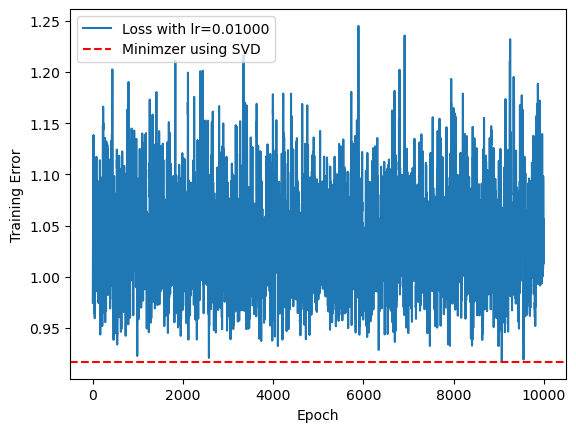

Epoch 0: Training error = 0.9792948185311843
Epoch 1000: Training error = 0.8653550832010699
Epoch 2000: Training error = 0.8639148479148797
Epoch 3000: Training error = 0.8705339402153833
Epoch 4000: Training error = 0.8625210517774141
Epoch 5000: Training error = 0.8569806979381064
Epoch 6000: Training error = 0.8642013192973863
Epoch 7000: Training error = 0.8668948301688238
Epoch 8000: Training error = 0.8632746257855434
Epoch 9000: Training error = 0.8628007564301647
Test RMSE = 0.8871113530426457


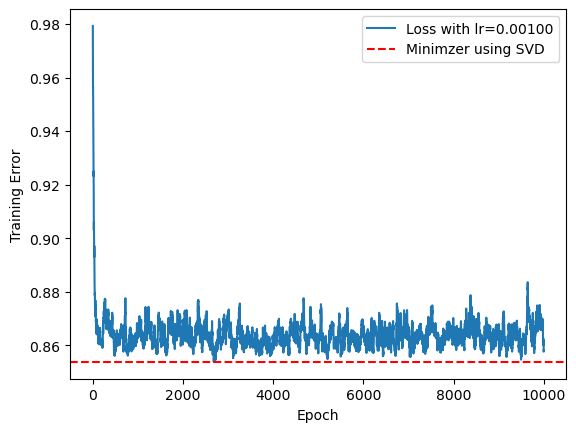

Epoch 0: Training error = 0.982328398202562
Epoch 1000: Training error = 0.8536823437380334
Epoch 2000: Training error = 0.8508674310921226
Epoch 3000: Training error = 0.8504961751475486
Epoch 4000: Training error = 0.8505280081953989
Epoch 5000: Training error = 0.8507055478125038
Epoch 6000: Training error = 0.8511151950563465
Epoch 7000: Training error = 0.8511316801315797
Epoch 8000: Training error = 0.8509477381618935
Epoch 9000: Training error = 0.850834997837657
Test RMSE = 0.8741787239041874


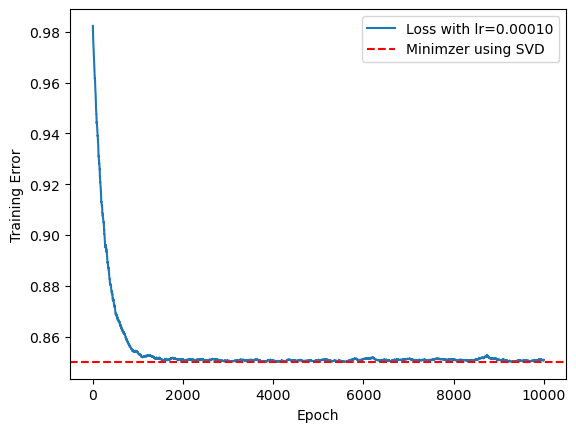

In [444]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')
x_train, y_train = x_train[:1000], y_train[:1000]
def sgd_mini_batch_size(x_train, y_train, x_test, y_test, batch_size=10, lr=0.0001, epochs=5000):
    # Initialize the weights with zeros
    w = np.zeros((x_train.shape[1], 1)) #(32,)
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        for j in range(batch_size):
            i = random.randint(0, len(y_train)-1)
            # print(x_train[i].shape)
            grad_w = -2 * np.dot(x_train[i].reshape(-1,1), (y_train[i] - np.dot(x_train, w)[i]).reshape(-1,1))
            # Update the weights
            
            # Compute the training error
            y_hat = x_train.dot(w)
            train_error = RMSE(y_train, y_hat)
            # print(w.shape)
            # print(grad_w.shape)
            w -= lr * grad_w
        # get best weights
        if len(train_errors) > 0 and train_error < train_errors[-1]:
            w_best = w
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % (epochs/10) == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")

    # Compute the predicted values for the testing dataset
    y_hat_test = np.dot(x_test, w_best)
    # Compute the testing error
    test_error = RMSE(y_test, y_hat_test)
     # Print the final testing error (root mean squared error)
    print(f"Test RMSE = {test_error}")
    # plot training error versus epochs
    plt.plot(range(1, epochs+1), train_errors, label="Loss with lr=%.5f"%lr)
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.axhline(y=np.min(train_errors), color='r', linestyle='--', label="Minimzer using SVD")
    plt.legend(loc='best')
    plt.show()

for lr in [0.01, 0.001, 0.0001]:
    sgd_mini_batch_size(x_train, y_train, x_test, y_test, 10, lr, 10000)

## Stochastic gradient descent (SGD) with mini-batch size 1 and momentum

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 1.660510251440941
Epoch 2000: Training error = 1.415095026157378
Epoch 3000: Training error = 1.628064580733076
Epoch 4000: Training error = 1.372027106473607
Epoch 5000: Training error = 1.4512998740244805
Epoch 6000: Training error = 1.3627078835600164
Epoch 7000: Training error = 1.2160571758725456
Epoch 8000: Training error = 1.3535024486210594
Epoch 9000: Training error = 1.5586713047579168
Test RMSE = 1.4537549679871102


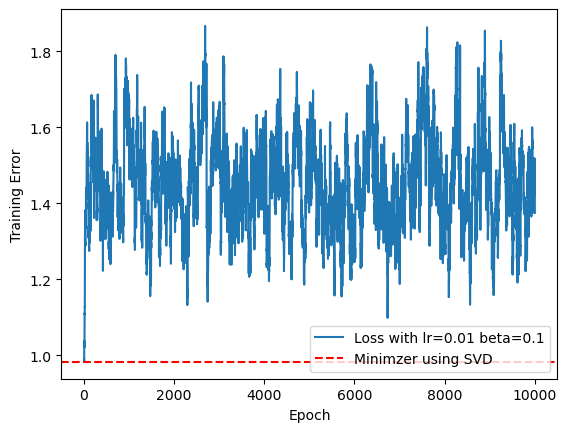

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 1.7404874043114287
Epoch 2000: Training error = 1.2806176613484064
Epoch 3000: Training error = 1.5938711613535297
Epoch 4000: Training error = 1.4434480733974144
Epoch 5000: Training error = 1.3941969802455696
Epoch 6000: Training error = 1.3892449984887953
Epoch 7000: Training error = 1.426838186090201
Epoch 8000: Training error = 1.2521134881765423
Epoch 9000: Training error = 1.56338357917306
Test RMSE = 1.4798453862218122


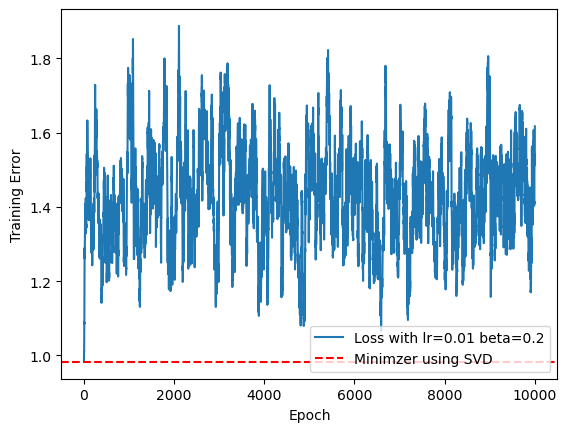

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 1.6659123696522438
Epoch 2000: Training error = 1.692439135260047
Epoch 3000: Training error = 1.367524022388311
Epoch 4000: Training error = 1.3459432172863737
Epoch 5000: Training error = 1.3382694784400917
Epoch 6000: Training error = 1.393837502660727
Epoch 7000: Training error = 1.5833992379253807
Epoch 8000: Training error = 1.5436641142946674
Epoch 9000: Training error = 1.5270516937458116
Test RMSE = 1.4352240915609407


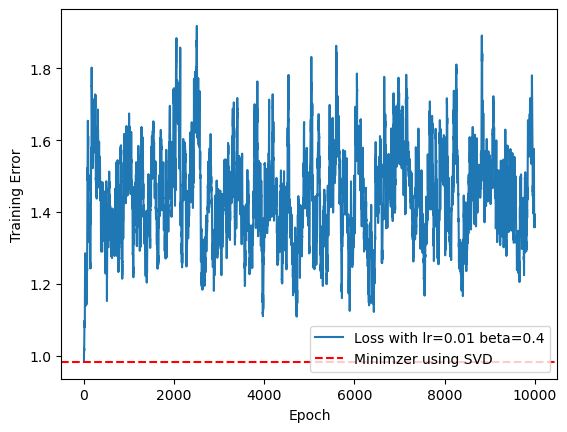

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 0.8685515481916507
Epoch 2000: Training error = 0.8891964906310823
Epoch 3000: Training error = 0.8792191296199297
Epoch 4000: Training error = 0.8784597949414363
Epoch 5000: Training error = 0.8935567200203562
Epoch 6000: Training error = 0.8722917791995085
Epoch 7000: Training error = 0.876001804704844
Epoch 8000: Training error = 0.8779599142139546
Epoch 9000: Training error = 0.8821216785183318
Test RMSE = 0.908697402886733


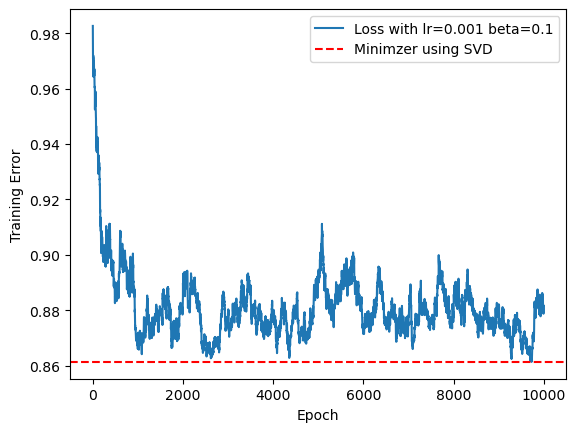

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 0.8780454635248156
Epoch 2000: Training error = 0.8753399740722139
Epoch 3000: Training error = 0.886215399490334
Epoch 4000: Training error = 0.8803173979260508
Epoch 5000: Training error = 0.8685514973874794
Epoch 6000: Training error = 0.868844164929704
Epoch 7000: Training error = 0.8940321826722473
Epoch 8000: Training error = 0.8835765322831263
Epoch 9000: Training error = 0.8850834976790208
Test RMSE = 0.9220315540515336


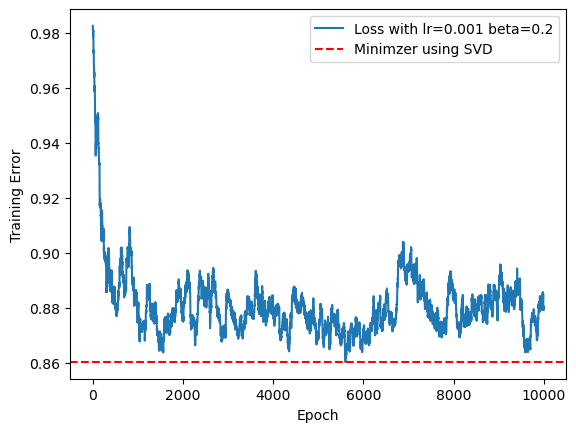

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 0.8662010872006587
Epoch 2000: Training error = 0.8774200471111847
Epoch 3000: Training error = 0.8772946179705916
Epoch 4000: Training error = 0.895024630221668
Epoch 5000: Training error = 0.8731027592959445
Epoch 6000: Training error = 0.8880299775647118
Epoch 7000: Training error = 0.8888686191234022
Epoch 8000: Training error = 0.8885699016703281
Epoch 9000: Training error = 0.8796584980944235
Test RMSE = 0.9085972410391775


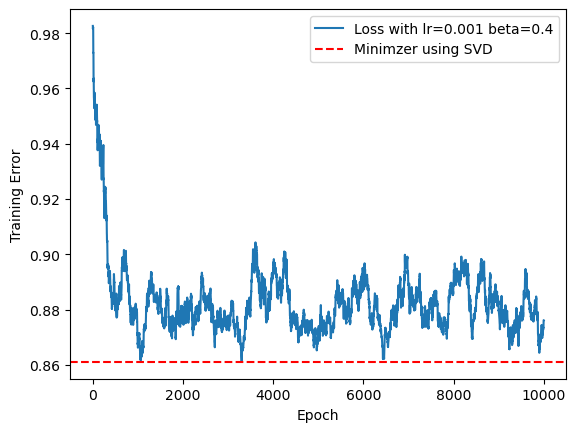

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 0.9035450927214119
Epoch 2000: Training error = 0.8741768904022207
Epoch 3000: Training error = 0.8606514260276937
Epoch 4000: Training error = 0.8581711606272406
Epoch 5000: Training error = 0.85626196636593
Epoch 6000: Training error = 0.8537345341926733
Epoch 7000: Training error = 0.8533561608573927
Epoch 8000: Training error = 0.8526492905199746
Epoch 9000: Training error = 0.8539163731660296
Test RMSE = 0.8767024702527156


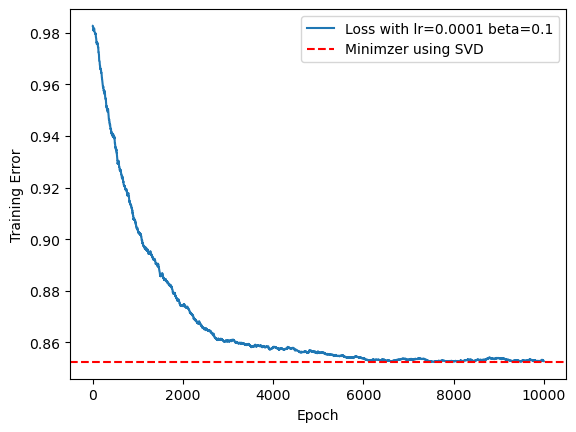

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 0.9163384833822203
Epoch 2000: Training error = 0.887735737301771
Epoch 3000: Training error = 0.8692453392815711
Epoch 4000: Training error = 0.8583300770353929
Epoch 5000: Training error = 0.8570393947260143
Epoch 6000: Training error = 0.8554675879607295
Epoch 7000: Training error = 0.8524293775274121
Epoch 8000: Training error = 0.8515701421085614
Epoch 9000: Training error = 0.8515714149580509
Test RMSE = 0.8684440108866998


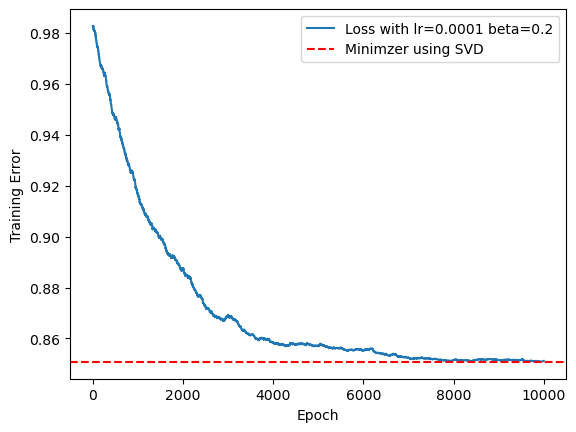

Epoch 0: Training error = 0.9826154352668733
Epoch 1000: Training error = 0.9201013873681425
Epoch 2000: Training error = 0.8807885991930221
Epoch 3000: Training error = 0.8677124474457457
Epoch 4000: Training error = 0.8596596848507524
Epoch 5000: Training error = 0.8546550692443802
Epoch 6000: Training error = 0.852002629311085
Epoch 7000: Training error = 0.8527984102491206
Epoch 8000: Training error = 0.8525899126506791
Epoch 9000: Training error = 0.8513236141434696
Test RMSE = 0.8733208196450244


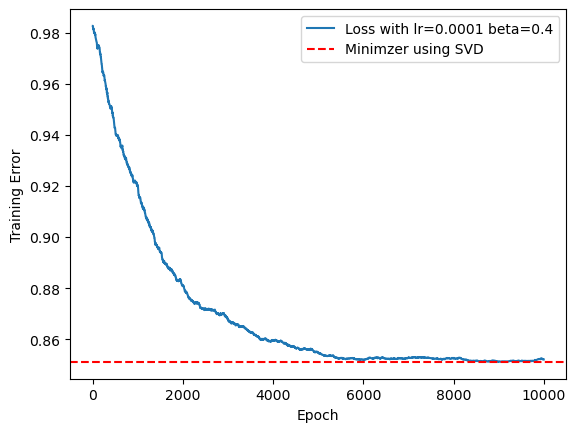

In [449]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('pumadyn32nm')
x_train, y_train = x_train[:1000], y_train[:1000]
def sgd_mini_batch_with_momentum(x_train, y_train, x_test, y_test, momentum, lr=0.0001, epochs=5000):
    # Initialize the weights with zeros
    w = np.zeros((x_train.shape[1], 1)) #(32,1)
    v_w = np.zeros((x_train.shape[1], 1))
    train_errors = []
    # Start the training loop
    for epoch in range(epochs):
        i = random.randint(0, len(y_train)-1)
        # print(x_train[i].shape)
        grad_w = -2 * np.dot(x_train[i].reshape(-1,1), (y_train[i] - np.dot(x_train, w)[i]).reshape(-1,1))
        # Update the weights
        
        # Compute the training error
        y_hat = x_train.dot(w)
        train_error = RMSE(y_train, y_hat)
        # print(w.shape)
        # print(grad_w.shape)
        v_w = (momentum * v_w + (1-momentum) * grad_w)
        w = w - lr * v_w
        w -= lr * grad_w
        # get best weights
        if len(train_errors) > 0 and train_error < train_errors[-1]:
            w_best = w
        train_errors.append(train_error)
        # Print the training error every 100 epochs
        if epoch % (epochs/10) == 0:
            print(f"Epoch {epoch}: Training error = {train_error}")

    # Compute the predicted values for the testing dataset
    y_hat_test = np.dot(x_test, w_best)
    # Compute the testing error
    test_error = RMSE(y_test, y_hat_test)
     # Print the final testing error (root mean squared error)
    print(f"Test RMSE = {test_error}")
    # plot training error versus epochs

    plt.plot(range(1, epochs+1), train_errors, label="Loss with lr=%s beta=%.1f"%(str(lr), momentum))
    plt.xlabel('Epoch')
    plt.ylabel('Training Error')
    plt.axhline(y=np.min(train_errors), color='r', linestyle='--', label="Minimzer using SVD")
    plt.legend(loc='best')
    plt.show()

for lr in [0.001, 0.0001]:
    for momentum in [0.2, 0.4]:
        sgd_mini_batch_with_momentum(x_train, y_train, x_test, y_test,momentum, lr, 10000)